In [2]:
!nvidia-smi
!python -V

# Stable pins for Kaggle (Python 3.10) that work with PyCaret 3.3.x
!pip -q install -U pip setuptools wheel
!pip -q install "pycaret==3.3.2" "gradio>=4,<5"

# sanity import
import sys, pycaret
print("Python:", sys.version.split()[0], "| PyCaret:", pycaret.__version__)


Thu Oct 23 18:16:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
peng = pd.read_csv(url)
print(peng.shape)
peng.head()


(344, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
use_cols = [
    "species", "island", "sex",
    "bill_length_mm", "bill_depth_mm",
    "flipper_length_mm", "body_mass_g"
]
df = peng[use_cols].dropna().reset_index(drop=True)

# keep target as STRING labels to avoid label-encoder clashes
df["species"] = df["species"].astype(str)

print("Clean shape:", df.shape)
df.head()


Clean shape: (333, 7)


,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,male,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,female,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,female,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,female,36.7,19.3,193.0,3450.0
4,Adelie,Torgersen,male,39.3,20.6,190.0,3650.0


In [4]:
from pycaret.classification import *

s = setup(
    data=df,                 # cleaned Penguins df from Cell 2
    target="species",
    session_id=42,
    use_gpu=True,
    fold=5,
    normalize=True,          # keep this; it's supported
    verbose=False            # keep logs quiet
)

top3   = compare_models(n_select=3, sort="F1")   # macro F1 for multiclass
tuned  = [tune_model(m, optimize="F1") for m in top3]
blended= blend_models(tuned, optimize="F1")
best   = automl(optimize="F1")
best


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9957,0.0000,0.9957,0.9959,0.9957,0.9932,0.9934,0.1640
lda,Linear Discriminant Analysis,0.9957,0.0000,0.9957,0.9959,0.9957,0.9932,0.9934,0.0740
lightgbm,Light Gradient Boosting Machine,0.9915,0.9991,0.9915,0.9921,0.9915,0.9866,0.9869,1.0660
knn,K Neighbors Classifier,0.9914,0.9999,0.9914,0.9920,0.9914,0.9865,0.9868,0.1240
et,Extra Trees Classifier,0.9870,0.9997,0.9870,0.9872,0.9870,0.9797,0.9798,0.2600
xgboost,Extreme Gradient Boosting,0.9870,0.9993,0.9870,0.9872,0.9870,0.9797,0.9798,0.3720
catboost,CatBoost Classifier,0.9871,0.9974,0.9871,0.9878,0.9870,0.9797,0.9801,7.9180
gbc,Gradient Boosting Classifier,0.9828,0.0000,0.9828,0.9832,0.9827,0.9730,0.9733,0.3800
dt,Decision Tree Classifier,0.9742,0.9814,0.9742,0.9751,0.9744,0.9598,0.9601,0.0740
ada,Ada Boost Classifier,0.9356,0.0000,0.9356,0.9456,0.9356,0.9002,0.9049,0.1600


[2025-10-23 18:21:47.194] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9787,0.0000,0.9787,0.9797,0.9783,0.9661,0.9668
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9957,0.0000,0.9957,0.9959,0.9957,0.9932,0.9934
Std,0.0085,0.0000,0.0085,0.0081,0.0087,0.0136,0.0133


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9787,0.0000,0.9787,0.9797,0.9783,0.9661,0.9668
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9957,0.0000,0.9957,0.9959,0.9957,0.9932,0.9934
Std,0.0085,0.0000,0.0085,0.0081,0.0087,0.0136,0.0133


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9787,1.0000,0.9787,0.9799,0.9788,0.9665,0.9672
2,0.9787,0.9972,0.9787,0.9797,0.9783,0.9661,0.9668
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9783,0.9986,0.9783,0.9802,0.9785,0.9664,0.9672
Mean,0.9871,0.9992,0.9871,0.9880,0.9871,0.9798,0.9802
Std,0.0105,0.0011,0.0105,0.0098,0.0105,0.0165,0.0161


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 186, number of used features: 6
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9787,1.0000,0.9787,0.9797,0.9783,0.9661,0.9668
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9957,1.0000,0.9957,0.9959,0.9957,0.9932,0.9934
Std,0.0085,0.0000,0.0085,0.0081,0.0087,0.0136,0.0133


LogisticRegression()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9900,1.0000,0.9900,0.9905,0.9901,0.9844,0.9845


,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,prediction_label,prediction_score
307,Dream,male,50.900002,19.1,196.0,3550.0,Chinstrap,Chinstrap,0.9853
161,Biscoe,male,49.299999,15.7,217.0,5850.0,Gentoo,Gentoo,0.9980
213,Biscoe,male,50.700001,15.0,223.0,5550.0,Gentoo,Gentoo,0.9988
232,Biscoe,female,47.500000,14.0,212.0,4875.0,Gentoo,Gentoo,0.9949
75,Torgersen,male,42.900002,17.6,196.0,4700.0,Adelie,Adelie,0.9854


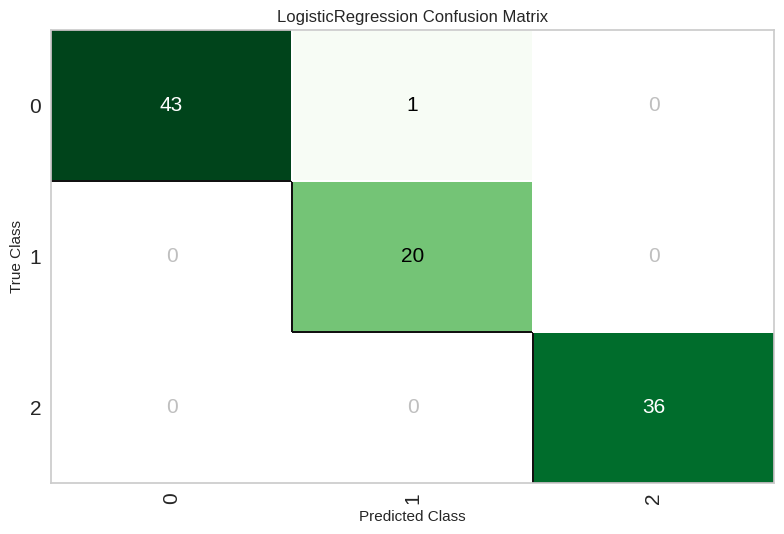

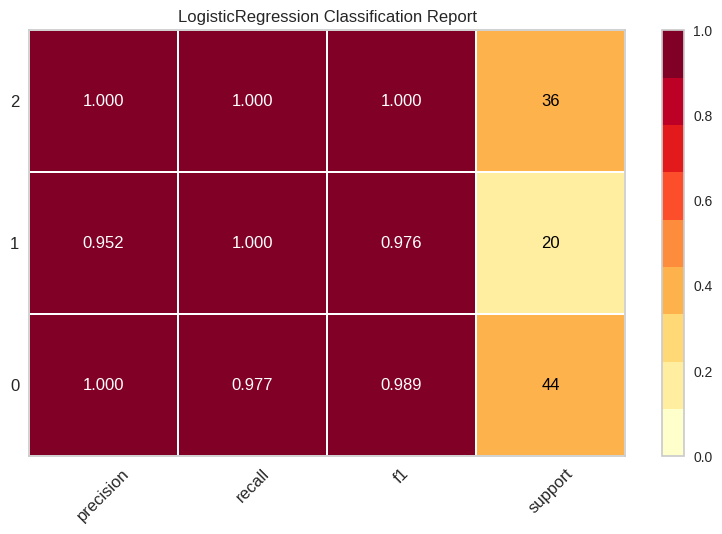

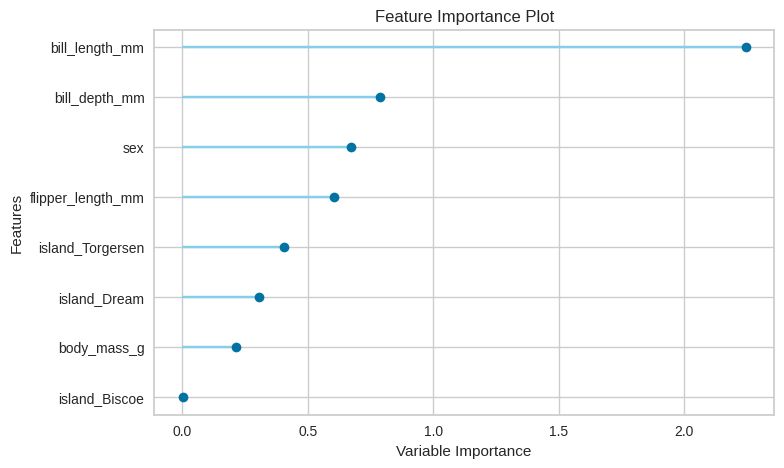

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,...
                  TransformerWrapper(exclude=None, include=['island'],
                                     transformer=OneHotEncoder(cols=['island'],
                                                               drop_invariant=

In [5]:
# Predictions on the hold-out set
pred_holdout = predict_model(best)
display(pred_holdout.head())

# Key evaluation plots
plot_model(best, plot="confusion_matrix")
plot_model(best, plot="class_report")
plot_model(best, plot="feature")

# Save leaderboard + model for your repo
lb = pull()

import os
os.makedirs("/kaggle/working/media/figures", exist_ok=True)
os.makedirs("/kaggle/working/notebooks", exist_ok=True)

lb.to_csv("/kaggle/working/media/figures/multiclass_penguins_leaderboard.csv", index=False)
save_model(best, "/kaggle/working/notebooks/multiclass_penguins_final")
